In [206]:
import os
import pandas as pd
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from wordcloud import WordCloud
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [207]:
#Stopword and add new word to clean text
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords.append('junio')
spanish_stopwords.append('sabado')
spanish_stopwords.append('tambien')
spanish_stopwords.append('mas')
spanish_stopwords.append('chile')
spanish_stopwords.append('chilenos')
spanish_stopwords.append('congreso')
spanish_stopwords.append('ser')
spanish_stopwords.append('estar')
spanish_stopwords.append('ademas')
spanish_stopwords.append('ello')
spanish_stopwords.append('cada')

#Stemmer 
stemmer = SnowballStemmer('spanish')

#characters remover
non_words = list(punctuation)

#Add spanish characters
non_words.extend(['¿', '¡'])

#Add digits
non_words.extend(map(str,range(10)))

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # lowercase
    text = text.lower()
    #remove tags
    text = re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text = re.sub("(\\d|\\W)+"," ",text)
    # remove links from tweets
    text = re.sub(r"http\S+", "https", text)
    #remove punctuation
    text = ''.join([c for c in text if c not in non_words])
    # remove repeated characters
    #text = re.sub(r'(.)\1+', r'\1\1', text)
    # tokenize
    tokens =  word_tokenize(text)
    # stem
    try:
        #remove stemmer to test result
        #stems = stem_tokens(tokens, stemmer)
        #stems = ' '.join(stems)
        stems = tokens
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems

In [208]:
file = open("publica.txt", "r+")
text = ''
for strl in file.readlines():
    text += strl.decode('utf-8')
file.close()

text = ''.join((c for c in unicodedata.normalize('NFD',unicode(text)) if unicodedata.category(c) != 'Mn'))

In [209]:
text = tokenize(text)

/Users/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [210]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words=spanish_stopwords)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(text)

In [211]:
freqs = [(word, tfidf_vectorizer_vectors.getcol(idx).sum()) for word, idx in tfidf_vectorizer.vocabulary_.items()]
d = {}
for k,v in freqs:
    d[k] = float(v)

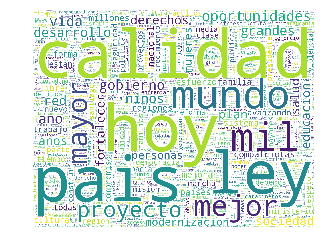

In [212]:
w = WordCloud(width=1270,height=980,mode='RGBA',background_color='white',max_words=2000).generate_from_frequencies(d)
plt.imshow(w)
plt.axis("off")
plt.show()

In [213]:
w.to_file("publica.png")

In [214]:
cv = CountVectorizer(ngram_range=(4,4), min_df = 0, stop_words=spanish_stopwords)
cv = CountVectorizer(ngram_range=(4,4))

In [215]:
test = [' '.join(text)]
cv.fit(test)
cv.get_feature_names()
cv.transform(test).toarray()


array([[1, 1, 1, ..., 1, 1, 1]])

In [216]:
# print idf values
datos = pd.DataFrame(cv.vocabulary_.items(), index=cv.get_feature_names())
del datos[0]

# sort ascending
datos.sort_values(by=[1], ascending=False)


,1
debe ser sinonimo de,9624
traves de la creacion,9623
ninos entre anos una,9622
mision noble compartida hemos,9621
chile respeta la autodeterminacion,9620
lleva siglos en conflicto,9619
chile propondremos este congreso,9618
mas del de la,9617
las familias queden sobre,9616
anos sabado de junio,9615
